In [1]:
import pandas as pd
import os
os. chdir("c:\\Users\\simon\\OneDrive\\Dokumente\\UNILU\\3 - HS24\\1 MA\\business-reports-nlp")
import matplotlib.pyplot as plt
#plt.style.use("default")
#plt.rcParams["font.family"] = "Times New Roman"
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
sns.set_style("white")

In [2]:
#df = pd.read_csv("data/paragraphs.csv")
df = pd.read_csv("data/final.csv")

In [3]:
df["char_count"] = df["content"].str.len()
df["spac_count"] = df['content'].str.count(" ")

In [4]:
print("Shortest text (in characters):")
print(min(df['content'].str.len()))
print("Shortest text (in spaces/words):")
print(min(df['content'].str.count(" ")))
print("Longest text (in characters):")
print(max(df['content'].str.len()))
print("Longest text (in spaces/words):")
print(max(df['content'].str.count(" ")))

Shortest text (in characters):
42
Shortest text (in spaces/words):
6
Longest text (in characters):
4719
Longest text (in spaces/words):
677


In [5]:
print("total number of reports:")
print(df['file_name'].nunique())

total number of reports:
227


In [23]:
print("total number of text segments:")
print(df['content'].nunique())

total number of text segments:
12254


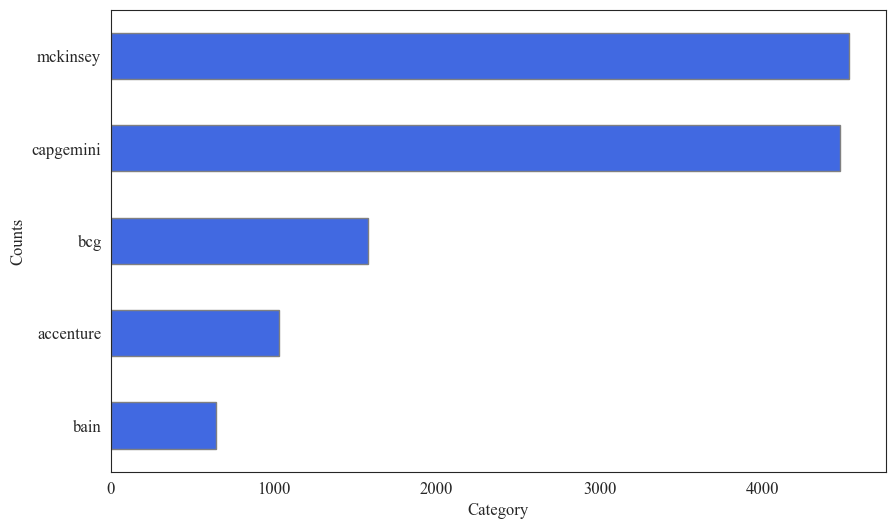

In [4]:
# count sources
source_counts = df['source'].value_counts().sort_values(ascending = False)
# set the font to Times New Roman for all text
plt.rcParams['font.family'] = 'Times New Roman'
# plot sources
plt.figure(figsize=(10, 6))
source_counts.plot(kind='barh', color = "royalblue", edgecolor='grey')
#source_counts.plot(kind='barh', color = 'lightblue', edgecolor='royalblue')
#plt.title('Value Counts in category_column')
plt.xlabel('Category', fontname='Times New Roman')
plt.ylabel('Counts', fontname='Times New Roman')
plt.gca().invert_yaxis()
plt.savefig('figs/descriptive/top-words.png', dpi=1200)
plt.show()

## Amount of Text by categories

### By Source (Consultancy)

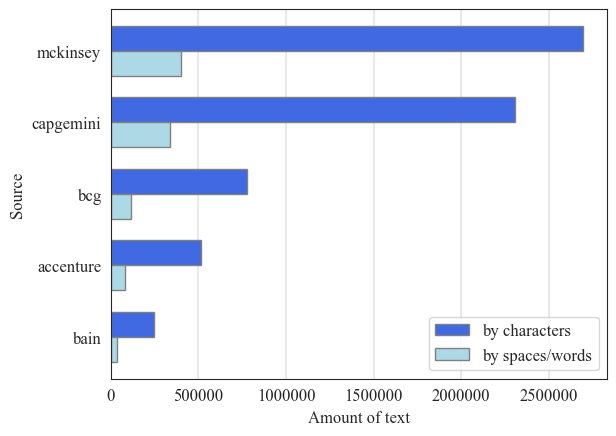

In [19]:
# calculate measurements
sources_text_length_char = df.groupby('source')['char_count'].sum()
sources_text_length_spac = df.groupby('source')['spac_count'].sum()
# combining measurements
sources = ['bain', 'accenture', 'bcg', 'capgemini', 'mckinsey']
sources_text_length_char = sources_text_length_char.reindex(sources)
sources_text_length_spac = sources_text_length_spac.reindex(sources)
# plotting
# Bar width
bar_width = 0.35

# Positions of bars on the x-axis
r1 = np.arange(len(sources_text_length_spac))
r2 = [x + bar_width for x in r1]

# Creating the bar plot
bars1 = plt.barh(r2, sources_text_length_char, color='royalblue', height=bar_width, edgecolor='grey', label='by characters')
bars2 = plt.barh(r1, sources_text_length_spac, color='lightblue', height=bar_width, edgecolor='grey', label='by spaces/words')
# Add labels
plt.xlabel('Amount of text', fontname='Times New Roman')
plt.ylabel('Source', fontname='Times New Roman')
#plt.title('Text Length for Each Measurement Type')
plt.yticks([r + bar_width/2 for r in range(len(sources_text_length_spac))], sources)
plt.legend()
# Adding labels to each bar
#for bar in bars1:
    #plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')
#for bar in bars2:
    #plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')
# Change x-axis to display real numbers
plt.gca().ticklabel_format(style='plain', axis='x', useOffset=False)
# Add grid
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.25)
plt.savefig('figs/descriptive/text-amount-by-source.png', dpi=1200)
# Show the plot
plt.show()

In [22]:
print("Number of characters for bain:")
print(df[df['source'] == 'bain']['char_count'].sum())
print("Number of characters for accenture:")
print(df[df['source'] == 'accenture']['char_count'].sum())

Number of characters for bain:
244551
Number of characters for accenture:
499547


### By Year

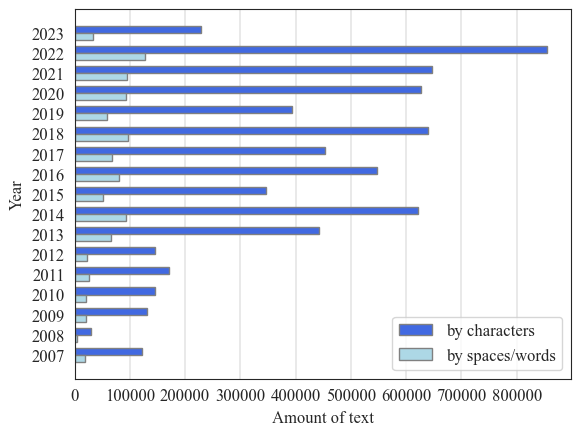

In [20]:
# calculate measurements
years_text_length_char = df.groupby('year')['char_count'].sum()
years_text_length_spac = df.groupby('year')['spac_count'].sum()
# combining measurements
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
years_text_length_char = years_text_length_char.reindex(years)
years_text_length_spac = years_text_length_spac.reindex(years)
# plotting
# Bar width
bar_width = 0.35

# Positions of bars on the x-axis
r1 = np.arange(len(years_text_length_spac))
r2 = [x + bar_width for x in r1]

# Creating the bar plot
bars1 = plt.barh(r2, years_text_length_char, color='royalblue', height=bar_width, edgecolor='grey', label='by characters')
bars2 = plt.barh(r1, years_text_length_spac, color='lightblue', height=bar_width, edgecolor='grey', label='by spaces/words')
# Add labels
plt.xlabel('Amount of text', fontname='Times New Roman')
plt.ylabel('Year', fontname='Times New Roman')
#plt.title('Text Length for Each Measurement Type')
plt.yticks([r + bar_width/2 for r in range(len(years_text_length_spac))], years)
plt.legend()
# Adding labels to each bar
#for bar in bars1:
    #plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')
#for bar in bars2:
    #plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')
# Change x-axis to display real numbers
plt.gca().ticklabel_format(style='plain', axis='x', useOffset=False)
# Add grid
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.25)
plt.savefig('figs/descriptive/text-amount-by-year.png', dpi=1200)
# Show the plot
plt.show()

In [24]:
print("Number of characters for the year 2008:")
print(df[df['year'] == 2008]['char_count'].sum())
print("Number of spaces between 2007 and 2012 (incl.):")
print(df[df['year'] < 2013]['spac_count'].sum())

Number of characters for the year 2008:
29032
Number of spaces between 2007 and 2012 (incl.):
113771


### Averages

The average number of characters within the text segments is:
534.0833197323323 (mean)
344.6540458520259 (sd)


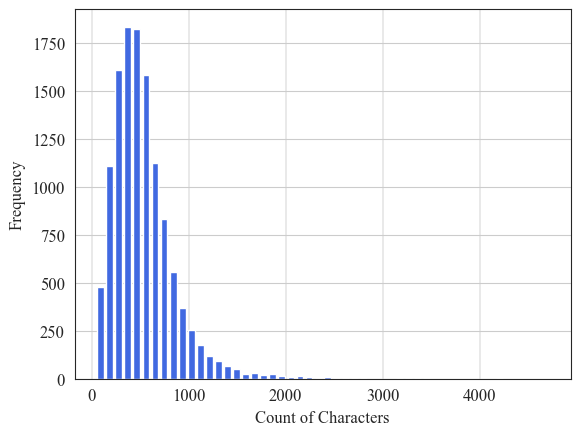

In [21]:
print("The average number of characters within the text segments is:")
print(df['char_count'].mean(), "(mean)")
print(df['char_count'].std(), "(sd)")
# Plot
df['char_count'].hist(bins=50, color = "royalblue", rwidth=0.75)
# Add labels and title
plt.xlabel('Count of Characters', fontname='Times New Roman')
plt.ylabel('Frequency', fontname='Times New Roman')
#plt.title('Frequency Distribution of Numbers')
# Add grid
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.25)
plt.savefig('figs/descriptive/char-count-freq.png', dpi=1200)
# Show the plot
plt.show()

The average number of spaces/words within the text segments is:
79.31769218214461
52.051770197891436 (sd)


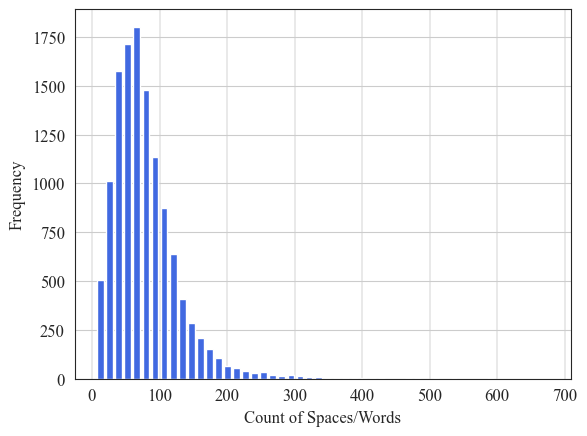

In [22]:
# 
print("The average number of spaces/words within the text segments is:")
print(df['spac_count'].mean())
print(df['spac_count'].std(), "(sd)")
# Plot
df['spac_count'].hist(bins=50, color = "royalblue", rwidth=0.75)
# Add labels and title
plt.xlabel('Count of Spaces/Words', fontname='Times New Roman')
plt.ylabel('Frequency', fontname='Times New Roman')
# Add grid
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.25)
#plt.title('Frequency Distribution of Numbers')
plt.savefig('figs/descriptive/word-count-freq.png', dpi=1200)
# Show the plot
plt.show()

## Most frequent words

### Remove Stop Words

In [14]:
# Set of English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(filtered_words)

# Apply the function to your DataFrame
df['filtered_text'] = df['content'].apply(remove_stop_words)

### Count Term Frequencies

In [15]:
# Count the frequencies of words
word_counts = Counter(" ".join(df['filtered_text']).split())

# Most common words
most_common_words = word_counts.most_common(25)  # You can adjust the number as needed
print(most_common_words)

[('payments', 9235), ('banks', 5274), ('digital', 3823), ('services', 3340), ('new', 3269), ('percent', 3017), ('growth', 2728), ('payment', 2720), ('customer', 2605), ('data', 2456), ('also', 2416), ('financial', 2227), ('market', 2105), ('customers', 2082), ('business', 2081), ('value', 1982), ('bank', 1966), ('transactions', 1943), ('banking', 1935), ('global', 1879), ('mobile', 1823), ('need', 1654), ('use', 1641), ('could', 1570), ('industry', 1355)]


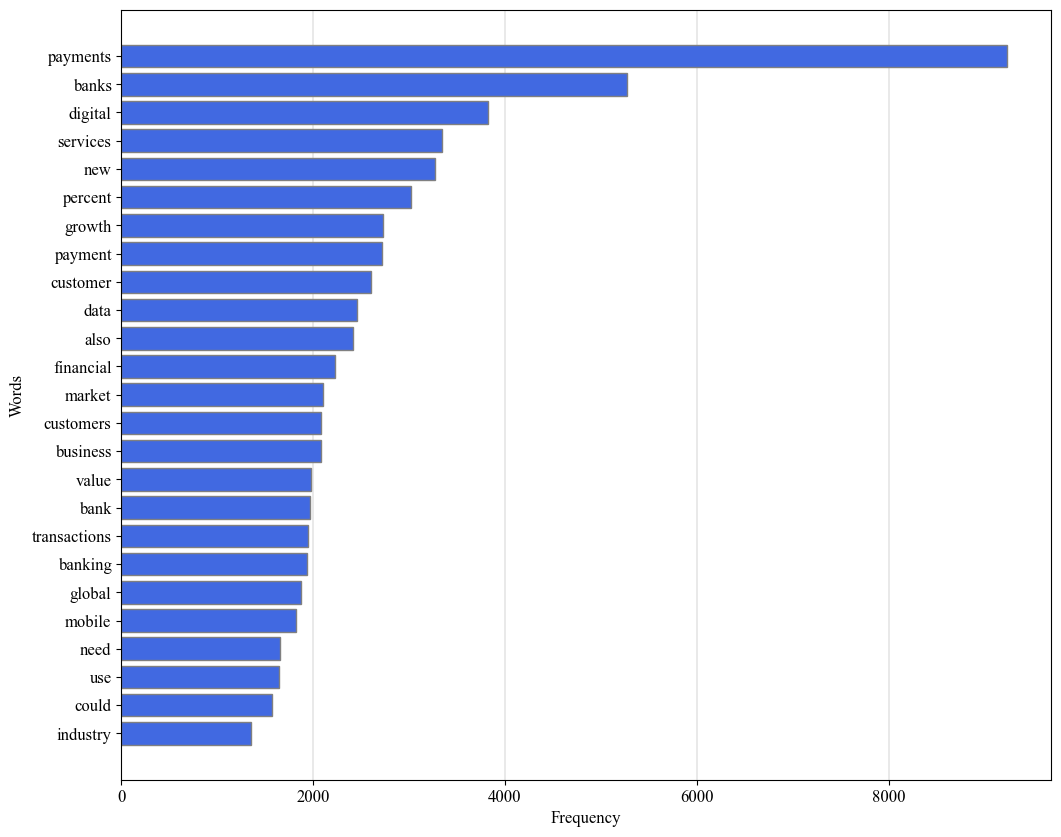

In [16]:
# Words and frequencies
words, freqs = zip(*most_common_words)

# Bar chart
plt.figure(figsize=(12, 10))  # Setting the figure size
plt.barh(words, freqs, color = "royalblue", edgecolor='grey')
plt.xlabel('Frequency')
plt.ylabel('Words')
#plt.title('Top Words Frequency')
plt.gca().invert_yaxis()
# Add grid
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.25)
plt.savefig('figs/descriptive/top-words.png', dpi=1200)
plt.show()

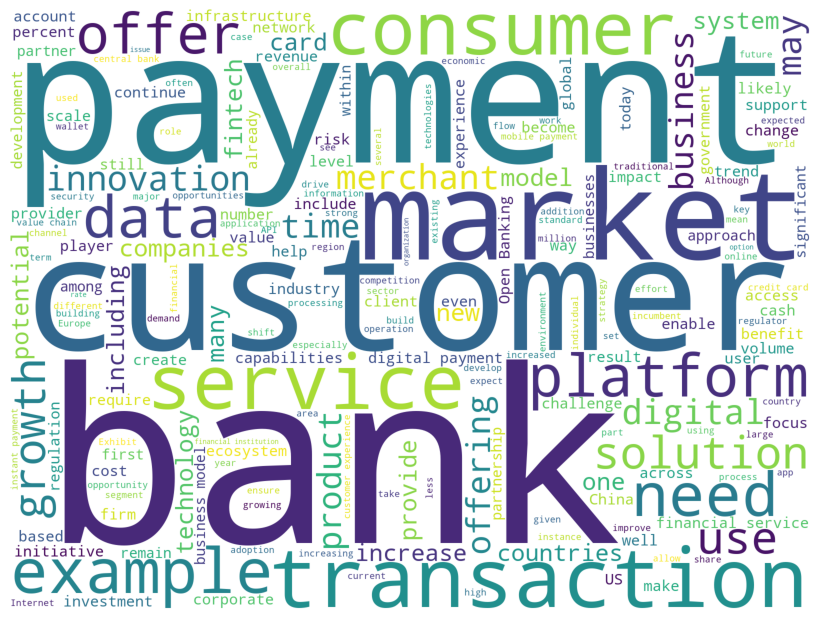

In [79]:
# Generate word cloud
wordcloud = WordCloud(width=1600, height=1200, background_color ='white').generate(" ".join(df['filtered_text']))

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()